In [4]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [5]:
df = pd.read_csv('https://github.com/tzekiattok/strokedata/blob/main/healthcare-dataset-stroke-data.csv?raw=true')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the dataset information, it is observed that there are 12 columns with 5110 records. <br>The 'bmi' column has 201 missing records which will need to be handled in the later stage.

<ul>
<li>Categorical variables: 'gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status' </li>
<li> Binary variables: 'hypertension', 'heart_disease', 'stroke'</li>
<li> Numerical variables: 'age', 'bmi', 'avg_glucose_level' </li>

In [7]:
df.drop('id', axis=1, inplace=True)

The 'id' column is dropped because it is not useful and may cause unwanted correlation. <br> The dataset now has 11 columns.

## Stroke Distribution

The dataset contains majority non-stroke records, since stroke is used as the target variable, the dataset is highly imbalanced, making it unreliable to build classification models and conduct our analysis.

As such, the team needs to find a way to deal with it. A possible solution is to use sampling methods such as Synthetic Minority Over-Sampling Technique to create synthetic minority class samples to resolve the imbalanced data issue when training the model.

In [8]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

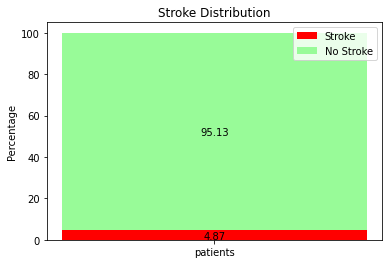

In [9]:
# Stroke Distribution
fig, ax = plt.subplots()

# Getting df data for only stroke patients #249
stroke = df[~(df['stroke'] == 0)]
# Getting df data for non-stroke patients #4861
no_stroke = df[~(df['stroke'] == 1)]

width = 0.35
labels = 'patients'

p1 = ax.bar(labels, (stroke['stroke'].count()/df['stroke'].count())*100, width, label='Stroke', color='red')
p2 = ax.bar(labels, (no_stroke['stroke'].count()/df['stroke'].count())*100, width, bottom=(stroke['stroke'].count()/df['stroke'].count())*100,
       label='No Stroke', color='palegreen')

ax.set_ylabel('Percentage')
ax.set_title('Stroke Distribution')
ax.legend()
        
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., round(h1, 2), ha="center",va="center_baseline")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., round(h2, 2), ha="center", va="center_baseline")

plt.show()

### Comparing other variables with relations to stroke patients

[Text(0.5, 1.0, 'Age distribution for stroke patients')]

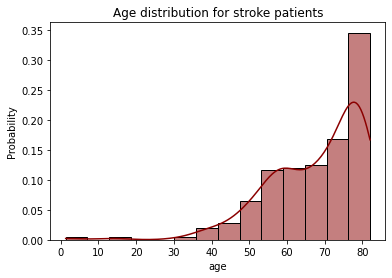

In [10]:
# Age Distribution
stroke = df[~(df['stroke'] == 0)]
sns.histplot(x=stroke['age'], kde=True, stat='probability', color="darkred").set(title="Age distribution for stroke patients")

<ul>
    <li>From the age distribution of stroke patients, it is observed that the distribution is negatively skewed indicating that the risk of stroke increases with age. Moreover, it seems that patients tend to get stroke from age 40 onwards. The probability of getting stroke doubled from the age range 50-60 and 70 to 80.
    </li>
</ul>

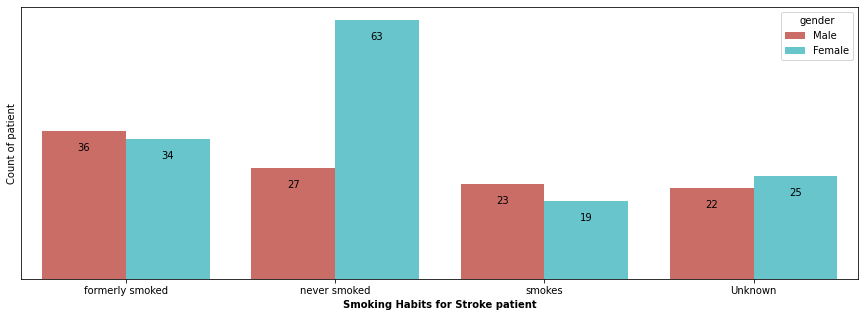

In [11]:
# Smoking Habits x Stroke

stroke = df[~(df['stroke'] == 0)]

fig1, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=stroke.smoking_status,hue=stroke.gender, palette='hls')
ax.set_xlabel('Smoking Habits for Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

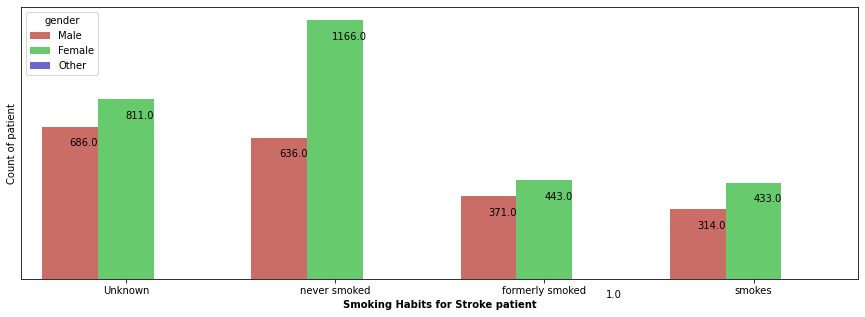

In [12]:
# Smoking Habits x Non-Stroke

non_stroke = df[~(df['stroke'] == 1)]

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=non_stroke.smoking_status,hue=non_stroke.gender, palette='hls')
ax.set_xlabel('Smoking Habits for Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

<ul>
    <li>
        From the countplot on smoking habits, surprisingly, the highest number of stroke patients fall under "do not smoke" category and female holds a higher weightage as compared to male. It seems that smoking status does not have a strong relation to stroke given that there is no clear pattern/trend observed for any of its category to have a strong inclination to stroke.
    </li>
</ul>

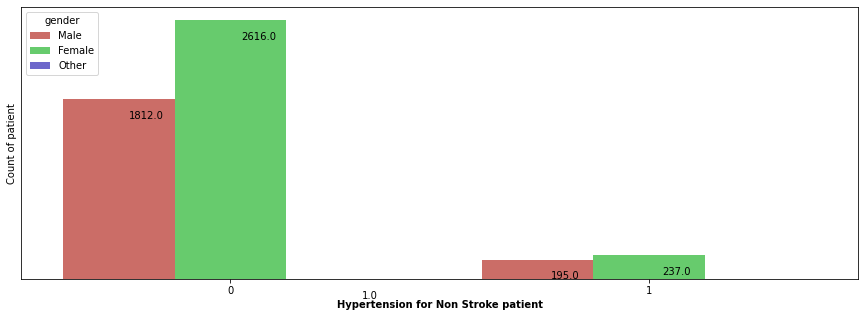

In [13]:
# Hypertension x Non Stroke

non_stroke = df[~(df['stroke'] == 1)]

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=non_stroke.hypertension,hue=non_stroke.gender, palette='hls')
ax.set_xlabel('Hypertension for Non Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

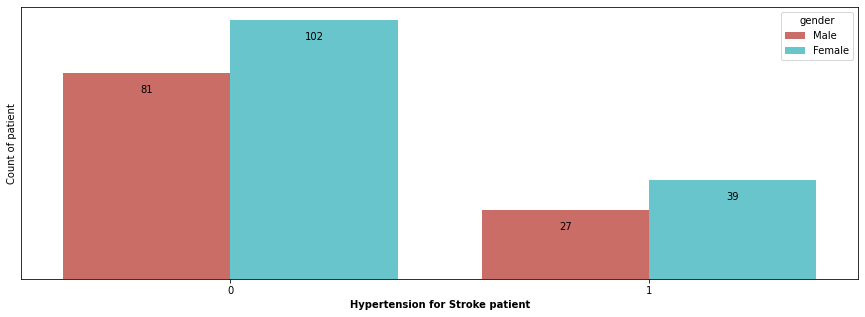

In [14]:
# Hypertension x Stroke

stroke = df[~(df['stroke'] == 0)]

fig1, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=stroke.hypertension,hue=stroke.gender, palette='hls')
ax.set_xlabel('Hypertension for Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

<ul>
    <li>
Hypertension and Stroke seems to have little Correlation based on the Plot Itself.
    </li>
        <li>
No Conclusion can be made from the graphs.
    </li>
</ul>

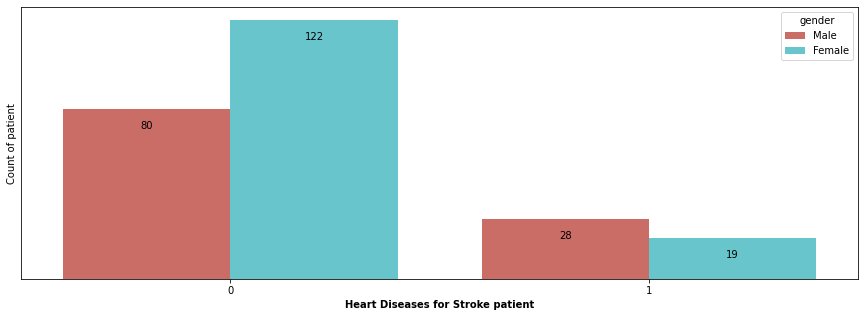

In [15]:
# Heart Disease x Stroke

stroke = df[~(df['stroke'] == 0)]

fig1, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=stroke.heart_disease,hue=stroke.gender, palette='hls')
ax.set_xlabel('Heart Diseases for Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

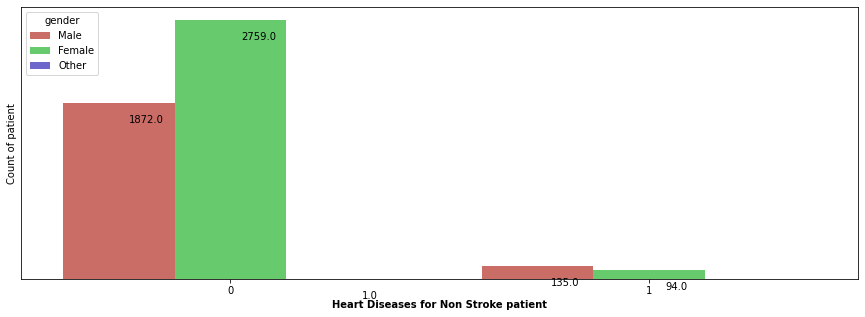

In [16]:
# Heart Disease x Non Stroke

non_stroke = df[~(df['stroke'] == 1)]

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=non_stroke.heart_disease,hue=non_stroke.gender, palette='hls')
ax.set_xlabel('Heart Diseases for Non Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

<ul>
    <li>
Heart Diseases and Stroke seems to have little Correlation based on the Plot Itself.
    </li>
        <li>
No Conclusion can be made from the graphs.
    </li>
</ul>

[Text(0.5, 1.0, 'Glucose Level for stroke patients')]

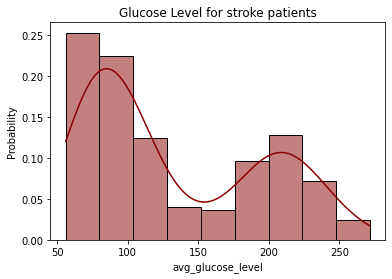

In [17]:
# Distribution of glucose and age to stroke

stroke = df[~(df['stroke'] == 0)]


sns.histplot(x=stroke['avg_glucose_level'], kde=True, stat='probability', color="darkred").set(title="Glucose Level for stroke patients")

[Text(0.5, 1.0, 'Glucose Level for stroke patients')]

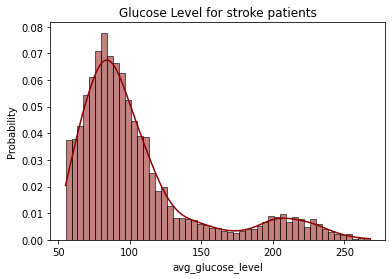

In [18]:
# Distribution of glucose and age to stroke

stroke = df[~(df['stroke'] == 1)]


sns.histplot(x=stroke['avg_glucose_level'], kde=True, stat='probability', color="darkred").set(title="Glucose Level for stroke patients")

<ul>
    <li>
        Curve of Glucose Level and Stroke/No Stroke seems remarkbly similar
    </li>
</ul>

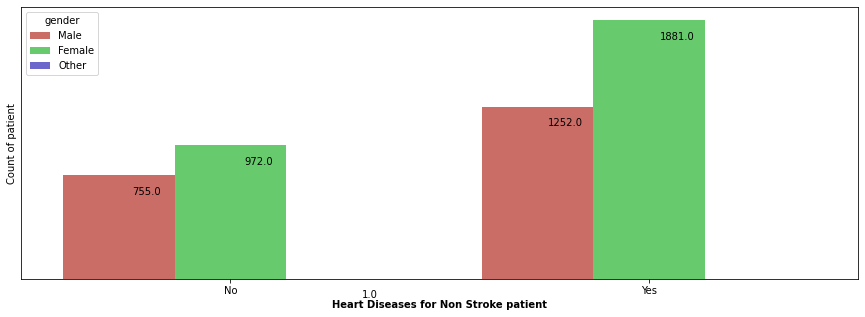

In [22]:
# Marital Status x Non Stroke

non_stroke = df[~(df['stroke'] == 1)]

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=non_stroke.ever_married,hue=non_stroke.gender, palette='hls')
ax.set_xlabel('Heart Diseases for Non Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

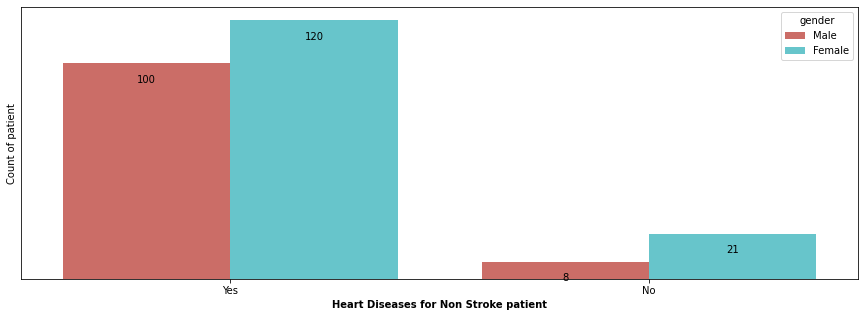

In [23]:
# Marital Status x Stroke

stroke = df[~(df['stroke'] == 0)]

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x=stroke.ever_married,hue=stroke.gender, palette='hls')
ax.set_xlabel('Heart Diseases for Non Stroke patient',fontsize=10, fontweight='bold')
ax.set_ylabel('Count of patient')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
ax.set_yticks([])
plt.show()

<ul>
    <li>
Maritial Status and Stroke seems to have little Correlation based on the Plot Itself.
    </li>
        <li>
No Conclusion can be made from the graphs.
    </li>
</ul>

[Text(0.5, 1.0, 'BMI for stroke patients')]

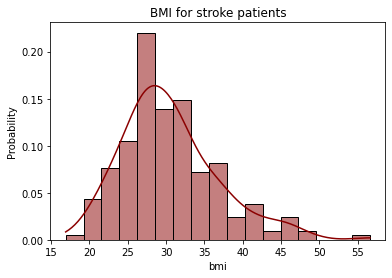

In [20]:
# BMI to Stroke

stroke = df[~(df['stroke'] == 0)]


sns.histplot(x=stroke['bmi'], kde=True, stat='probability', color="darkred").set(title="BMI for stroke patients")

[Text(0.5, 1.0, 'BMI for stroke patients')]

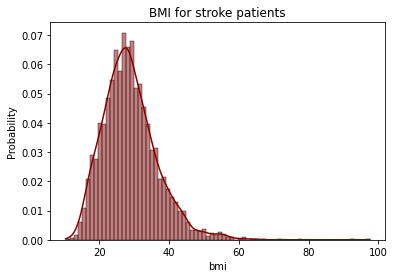

In [24]:
# BMI to Stroke

non_stroke = df[~(df['stroke'] == 1)]


sns.histplot(x=non_stroke['bmi'], kde=True, stat='probability', color="darkred").set(title="BMI for stroke patients")

<ul>
    <li>
        Curve of Glucose Level and Stroke/No Stroke seems remarkbly similar
    </li>
</ul>

# Scale of Numerical Values

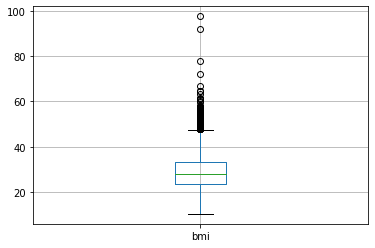

In [ ]:
df.boxplot(column="bmi")

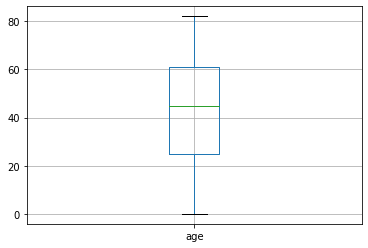

In [ ]:
df.boxplot(column="age")

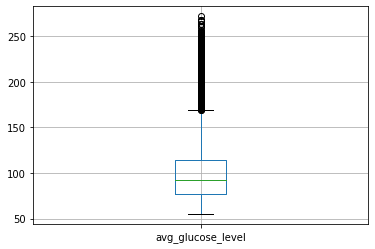

In [ ]:
df.boxplot(column="avg_glucose_level")

# Handling of Missing Values 'BMI'

Considering that missing values may affect the correlation of bmi to stroke, we decided to handle it before performing further EDA.
<ul>
    <li> More prominent differences for BMI is observed from gender.</li>
    <li>Age has the highest correlation to BMI variable.</li>
    <li>Impute missing values using Decision Tree Regressor -> Use Age and Gender to predict the missing BMI values and replace the missing values.</li>
    <li>The dataset no longer has any missing values. </li>
</ul>

In [ ]:
df[df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


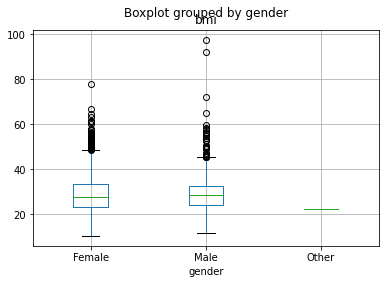

In [ ]:
df.boxplot(column="bmi",by="gender")

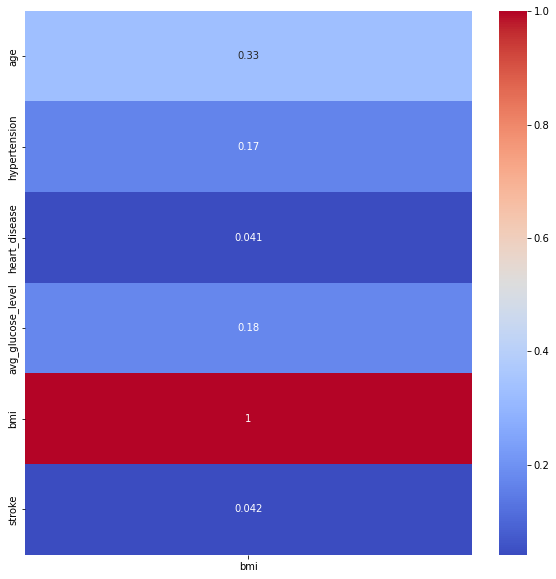

In [ ]:
# correlation to BMI
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr[['bmi']], annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=0))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Encoding for relevant categorical variables

In [ ]:
# Label Encoding - Categorical data with binary response

if df['ever_married'].dtype == type(object):
    le = preprocessing.LabelEncoder()
    df['ever_married'] = le.fit_transform(df['ever_married'])
    
if df['Residence_type'].dtype == type(object):
    le = preprocessing.LabelEncoder()
    df['Residence_type'] = le.fit_transform(df['Residence_type'])
        
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,29.879487,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [ ]:
# One Hot Encode - Categorical data with >2 types of response

df_encoded = df
df_encoded= pd.concat([df_encoded, pd.get_dummies(df_encoded['gender'], prefix = 'gender=')], axis = 1).drop(['gender'], axis = 1)
df_encoded= pd.concat([df_encoded, pd.get_dummies(df_encoded['work_type'], prefix = 'work_type=')], axis = 1).drop(['work_type'], axis = 1)
df_encoded= pd.concat([df_encoded, pd.get_dummies(df_encoded['smoking_status'], prefix = 'smoking_status=')], axis = 1).drop(['smoking_status'], axis = 1)
df1 = df_encoded
df_encoded.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender=_Female,gender=_Male,gender=_Other,work_type=_Govt_job,work_type=_Never_worked,work_type=_Private,work_type=_Self-employed,work_type=_children,smoking_status=_Unknown,smoking_status=_formerly smoked,smoking_status=_never smoked,smoking_status=_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,29.879487,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0


### Correlation of variables
<ul>
    <li> All features has a low correlation to each other, all below 0.7.</li>
    <li> In relation to stroke, age has the highest correlation, followed by hypertension, heart_disease and avg_glucose_level then ever_married. The remaining are all below 0.1 which is rather insignficant.</li>
    <li> From the correlation results, it is possible that the team may face issues on feature selection using methods like PCA given the low correlation between variables, and indicates that there will not be any multicollinearity problem.</li>
</ul>

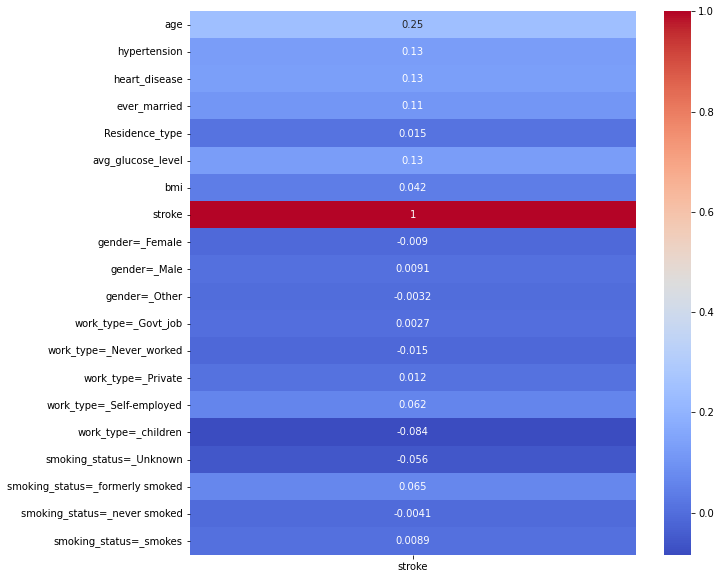

In [ ]:
corr = df1.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr[['stroke']], annot = True, cmap = 'coolwarm')
plt.show()

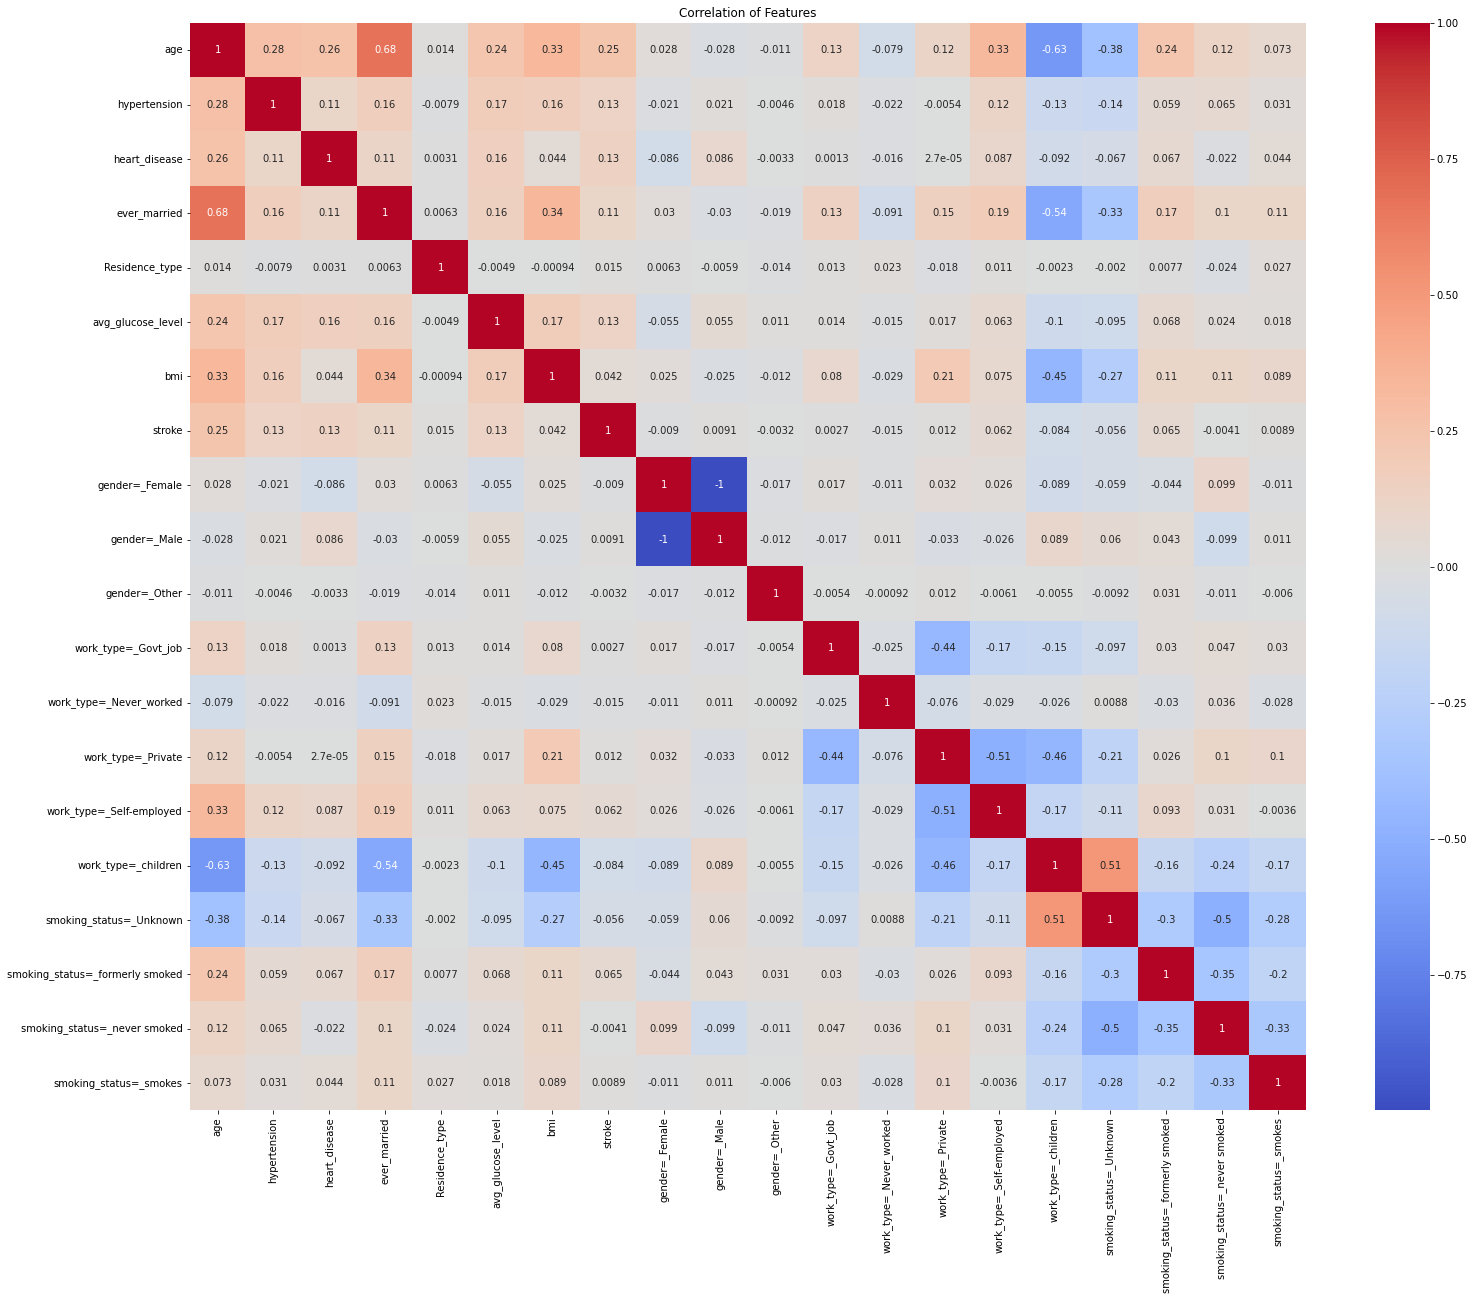

In [ ]:
corr = df1.corr()
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'coolwarm').set(title="Correlation of Features")
plt.show()

# Normalisation of numerical variables

<ul>
    <li>Perform data transformation to see if there is any impact to the correlation of variables to target variable, stroke </li>
    <li>Identify columns 'avg_glucose_level' and 'bmi' to be skewed. Perform np.log to transform the variables, then using standard scaler to standardise the dataset.</li>
    <li>From the results of the correlation to stroke, after transformation and standardisation, column 'bmi' has a slightly higher correlation from 0.042 to 0.056, while column 'avg_glucose_level' has a slightly lower correlation from 0.13 to 0.12. </li>
</ul>

In [ ]:
df_numeric = df1[["age", "avg_glucose_level", "bmi"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f973d3abdd0>,
      dtype=object)

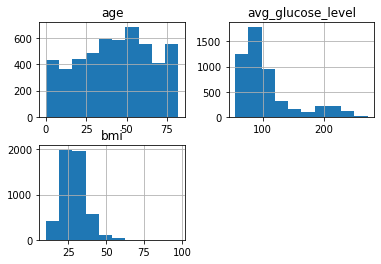

In [ ]:
df_numeric.hist()

In [ ]:
df_numeric.skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.047423
dtype: float64

In [ ]:
df_numeric['log_avg_glucose_level'] = np.log(df_numeric['avg_glucose_level'])
df_numeric['log_bmi'] = np.log(df_numeric['bmi'])

print(df_numeric.head())
print("\nskewness after transformation:\n")
print(df_numeric.skew())

    age  avg_glucose_level        bmi  log_avg_glucose_level   log_bmi
0  67.0             228.69  36.600000               5.432367  3.600048
1  61.0             202.21  29.879487               5.309307  3.397172
2  80.0             105.92  32.500000               4.662684  3.481240
3  49.0             171.23  34.400000               5.143008  3.538057
4  79.0             174.12  24.000000               5.159745  3.178054

skewness after transformation:

age                     -0.137059
avg_glucose_level        1.572284
bmi                      1.047423
log_avg_glucose_level    0.882751
log_bmi                 -0.029180
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_numeric.drop('bmi', axis=1, inplace=True)
df_numeric.drop('avg_glucose_level', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f973d8ae990>,
      dtype=object)

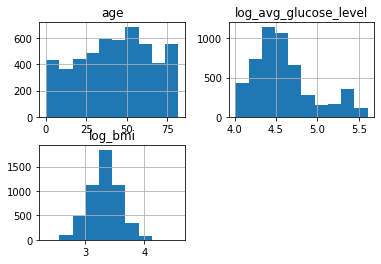

In [ ]:
df_numeric.hist()

In [ ]:
df1['log_bmi'] = df_numeric['log_bmi']
df1['log_avg_glucose_level'] = df_numeric['log_avg_glucose_level']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

scaler1.fit(df1)

scaler1.mean_

df1_scaled = scaler1.transform(df1)

In [ ]:
df1_scaled_adjust = pd.DataFrame(df1_scaled, columns = df1.columns)
round(df1_scaled_adjust.describe(), 3)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender=_Female,gender=_Male,gender=_Other,work_type=_Govt_job,work_type=_Never_worked,work_type=_Private,work_type=_Self-employed,work_type=_children,smoking_status=_Unknown,smoking_status=_formerly smoked,smoking_status=_never smoked,smoking_status=_smokes,log_bmi,log_avg_glucose_level
count,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.00,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.00,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.908,-0.329,-0.239,-1.381,-1.016,-1.127,-2.408,-0.226,-1.190,-0.84,-0.014,-0.384,-0.066,-1.157,-0.437,-0.394,-0.658,-0.458,-0.767,-0.427,-3.818,-1.611
25%,-0.806,-0.329,-0.239,-1.381,-1.016,-0.638,-0.675,-0.226,-1.190,-0.84,-0.014,-0.384,-0.066,-1.157,-0.437,-0.394,-0.658,-0.458,-0.767,-0.427,-0.630,-0.678
50%,0.078,-0.329,-0.239,0.724,0.984,-0.315,-0.080,-0.226,0.841,-0.84,-0.014,-0.384,-0.066,0.864,-0.437,-0.394,-0.658,-0.458,-0.767,-0.427,0.048,-0.199
75%,0.786,-0.329,-0.239,0.724,0.984,0.175,0.515,-0.226,0.841,1.19,-0.014,-0.384,-0.066,0.864,-0.437,-0.394,1.520,-0.458,1.304,-0.427,0.624,0.399
max,1.715,3.043,4.185,0.724,0.984,3.657,8.884,4.418,0.841,1.19,71.477,2.603,15.208,0.864,2.289,2.537,1.520,2.185,1.304,2.340,4.783,2.797


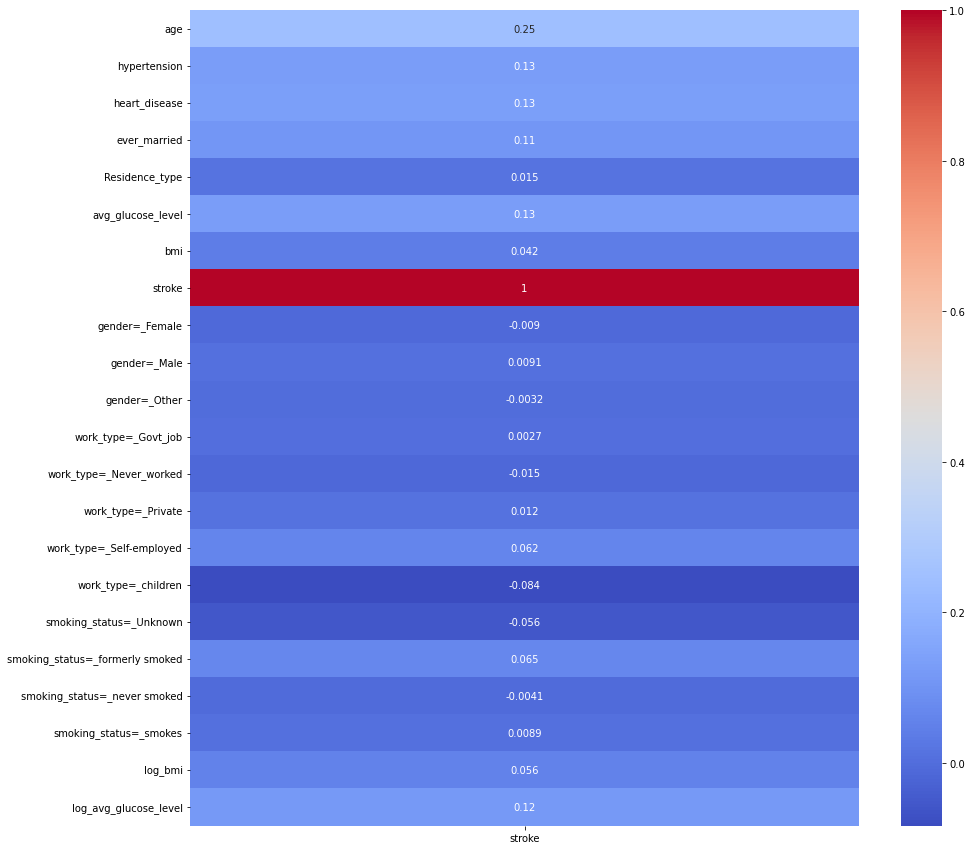

In [ ]:
corr = df1_scaled_adjust.corr()
plt.figure(figsize = ((15, 15)))
sns.heatmap(corr[['stroke']], annot=True, cmap='coolwarm')

plt.show()